In [1]:
pip install pandas numpy yfinance matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
# List of stock symbols in the portfolio
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'ETL']

In [7]:
# Download historical data as dataframe
data = yf.download(stocks, start="2019-01-01", end="2023-05-23")['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [8]:
# Compute returns
returns = data.pct_change()

In [9]:
# Number of portfolios to simulate
num_portfolios = 10000

In [10]:
# Create a data frame to hold results
results = pd.DataFrame(columns=['Returns', 'Volatility', 'Sharpe Ratio'], index=range(num_portfolios))

In [11]:
for i in range(num_portfolios):
    # Generate a random weight vector
    weights = np.random.random(len(stocks))
    
    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    # Calculate expected return and volatility
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    
    # Calculate Sharpe Ratio
    sharpe_ratio = portfolio_return / portfolio_std_dev
    # Calculate Sharpe Ratio
    sharpe_ratio = portfolio_return / portfolio_std_dev
    
    # Store results in the dataframe
    results.loc[i, 'Returns'] = portfolio_return
    results.loc[i, 'Volatility'] = portfolio_std_dev
    results.loc[i, 'Sharpe Ratio'] = sharpe_ratio

# Convert to float for plotting
results = results.astype(float)

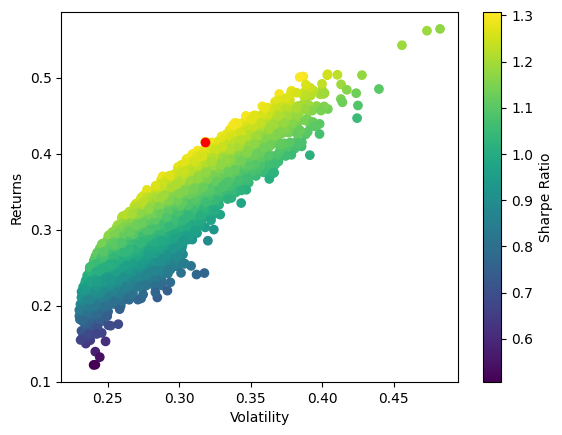

In [12]:
# Find portfolio with highest Sharpe Ratio
max_sharpe = results.loc[results['Sharpe Ratio'].idxmax()]

# Plot the distribution of portfolio returns and volatilities
plt.scatter(results['Volatility'], results['Returns'], c=results['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(max_sharpe['Volatility'], max_sharpe['Returns'], c='red')  # Mark the portfolio with highest Sharpe Ratio
plt.show()
